In [21]:
import pandas as pd
data = pd.read_csv('C:/Users/Tibor/Data/formatted/secondly/20210907_Binance_XRPUSDT_secondly_bars.csv')
data['volume_paid'] = data['volume'] - data['volume_given']
data['volume_imbalance'] = (data['volume_paid'] - data['volume_given'])/data['volume']
data['return'] = data['vwap'].diff(1).shift(-1)/data['vwap']
data = data.dropna()
data

,Unnamed: 0,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,volume_paid,volume_imbalance,return
0,0,1630972506000,1.630973e+12,1.630973e+12,13896,13894,13896,13897,13894,103811,10087,93724,0.805666,0.000000
1,1,1630972507000,1.630973e+12,1.630973e+12,13896,13896,13896,13897,13896,101560,25819,75741,0.491552,0.000072
2,2,1630972508000,1.630973e+12,1.630973e+12,13897,13897,13898,13898,13897,65369,30541,34828,0.065582,0.000072
3,3,1630972509000,1.630973e+12,1.630973e+12,13898,13898,13899,13899,13898,32468,1925,30543,0.881422,0.000072
4,4,1630972510000,1.630973e+12,1.630973e+12,13899,13899,13899,13900,13899,34836,9703,25133,0.442933,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86281,86688,1631059194000,1.631059e+12,1.631059e+12,11257,11255,11261,11261,11254,658574,22039,636535,0.933071,0.000444
86282,86689,1631059195000,1.631059e+12,1.631059e+12,11262,11262,11264,11264,11262,24741,5456,19285,0.558951,0.000533
86283,86690,1631059196000,1.631059e+12,1.631059e+12,11268,11263,11273,11273,11263,670018,24020,645998,0.928300,0.000710
86284,86691,1631059197000,1.631059e+12,1.631059e+12,11276,11273,11278,11279,11273,706235,312905,393330,0.113879,0.000443


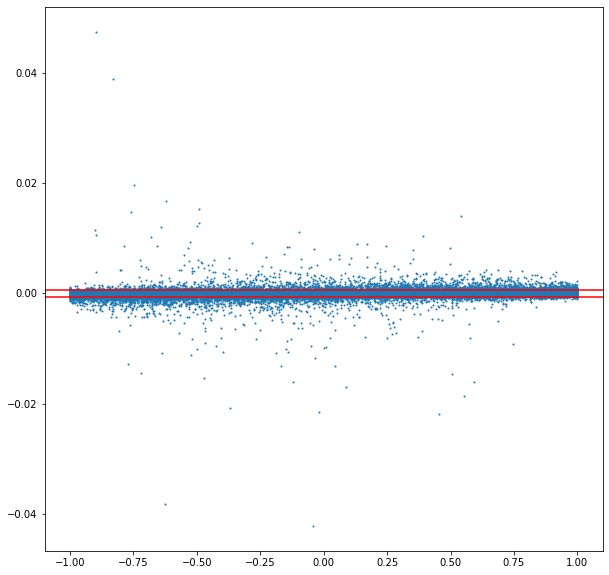

In [51]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
scatter(data['volume_imbalance'], data['return'], s=1)
plt.axhline(np.mean(data['return']) + np.std(data['return']),color='r')
plt.axhline(np.mean(data['return']) - np.std(data['return']),color='r')

In [54]:
import numpy as np
np.mean(np.array(data['return'][data['volume_imbalance'] > 0.9]))

5.4383871061372084e-05

In [68]:
import numpy as np
from scipy.optimize import curve_fit
def curve(x, a):
    return -np.exp(-a*x) + np.exp(a*x)
curve_fit(curve, data['volume_imbalance'], data['return'])

(array([4.47854145e-05]), array([[2.16318007e-12]]))

In [75]:
sum((data['return'][data['volume_imbalance'] > 0.99] - curve(data['volume_imbalance'][data['volume_imbalance'] > 0.99], 4.47854145e-05))**2)

0.00023830820898300246

In [70]:
import numpy as np
from scipy.optimize import curve_fit
def curve2(x, a):
    return a*x
curve_fit(curve2, data['volume_imbalance'], data['return'])

(array([8.95726087e-05]), array([[8.6530449e-12]]))

In [76]:
sum((data['return'][data['volume_imbalance'] > 0.99] - curve2(data['volume_imbalance'][data['volume_imbalance'] > 0.99], 8.95726087e-05))**2)

0.00023831029015921552